# Open in Google Colab

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arsalmairaj2k/taxi_trip_analysis/blob/main/Task8.ipynb)

# Task 8: Comparing Holdout Validation, Cross-Validation, and K-Fold Validation

In this task, I will take an example dataset from the datasets available with sklearn.datasets

# Dataset Selection

In [13]:
from sklearn.datasets import fetch_lfw_people # Labeled Faces in the Wild dataset (face recognition)

# Required Libraries

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, f1_score  
import matplotlib.pyplot as plt

## 1. Dataset Selection: Fetch LFW People dataset

In [25]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data  # Features (flattened face images)
y = lfw_people.target  # Target variable (person labels)

# Print information about the dataset
print("Number of images:", lfw_people.images.shape[0])
print("Image shape:", lfw_people.images.shape[1:])  # Height and width
print("Number of features (per image):", lfw_people.data.shape[1])
print("Number of classes (people):", len(lfw_people.target_names))

# Print the shape of the features and target
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Number of images: 1288
Image shape: (50, 37)
Number of features (per image): 1850
Number of classes (people): 7
Shape of X: (1288, 1850)
Shape of y: (1288,)


## 2. Implement Validation Techniques:

In [35]:
# a. Holdout Validation (80-20 split)
X_train_holdout, X_test_holdout, y_train_holdout, y_test_holdout = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_holdout = LogisticRegression(max_iter=10, n_jobs=-1) 
model_holdout.fit(X_train_holdout, y_train_holdout)
y_pred_holdout = model_holdout.predict(X_test_holdout)

# b. K-Fold Cross-Validation (k=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model_kfold = LogisticRegression(max_iter=10, n_jobs=-1)  
accuracy_scores_kfold = cross_val_score(
    model_kfold, X, y, cv=kfold, scoring='accuracy')


## 3. Compare Performance Metrics:

Holdout Validation:
  Accuracy: 0.5271
  F1-score: 0.4467

K-Fold Cross-Validation:
  Mean Accuracy: 0.5210
  Std Accuracy: 0.0130


Comparison Table:
         Accuracy  F1-score   Std Dev
Holdout  0.527132   0.44669       NaN
K-Fold   0.520954       NaN  0.012963


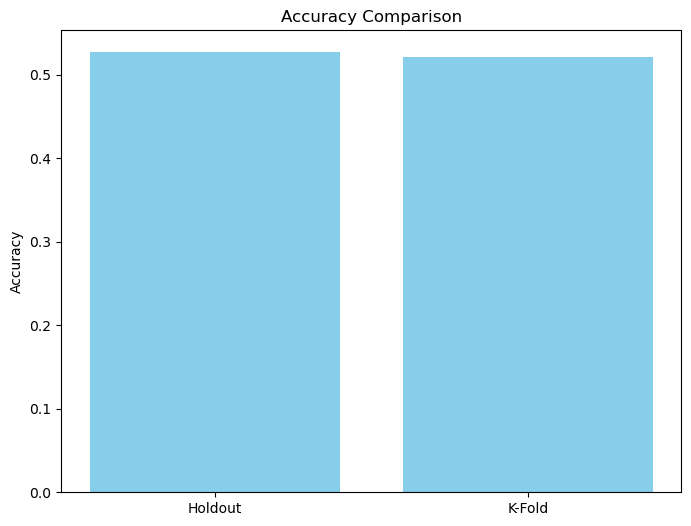

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (3,).

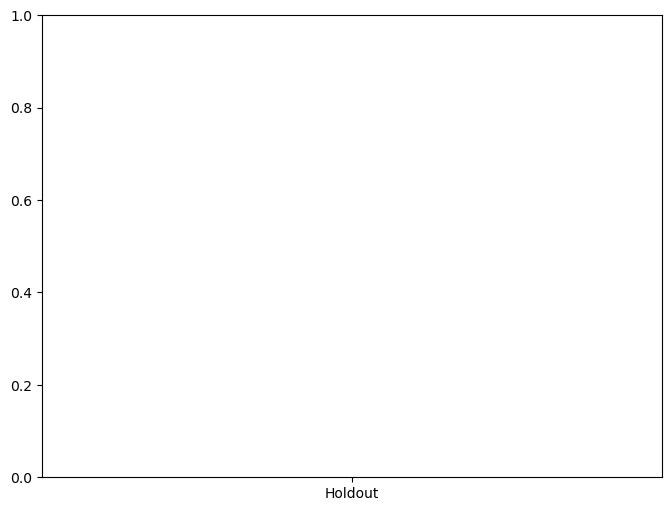

In [39]:
# Holdout
accuracy_holdout = accuracy_score(y_test_holdout, y_pred_holdout)
f1_holdout = f1_score(y_test_holdout, y_pred_holdout, average='weighted') # Added F1-score

# K-Fold
accuracy_kfold_mean = accuracy_scores_kfold.mean()
accuracy_kfold_std = accuracy_scores_kfold.std()

# Print and Plot Results
print("Holdout Validation:")
print(f"  Accuracy: {accuracy_holdout:.4f}")
print(f"  F1-score: {f1_holdout:.4f}\n")

print("K-Fold Cross-Validation:")
print(f"  Mean Accuracy: {accuracy_kfold_mean:.4f}")
print(f"  Std Accuracy: {accuracy_kfold_std:.4f}\n")


results = {
    'Holdout': [accuracy_holdout, f1_holdout, np.nan],
    'K-Fold': [accuracy_kfold_mean, np.nan, accuracy_kfold_std]
}

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'F1-score', 'Std Dev'])

print("\nComparison Table:")
print(results_df)

# Plotting Accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Holdout', 'K-Fold'], [accuracy_holdout, accuracy_kfold_mean], color='skyblue')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

# Plotting F1-score
plt.figure(figsize=(8, 6))
plt.bar(['Holdout', 'K-Fold'], [f1_holdout, np.nan, np.nan ], color='lightcoral')
plt.ylabel('F1-score')
plt.title('F1-score Comparison')
plt.show()

## 4. Discuss Bias-Variance Tradeoff

### Holdout Validation:

Bias: Holdout validation can introduce bias if the chosen test set is not representative of the overall data distribution. If the test set happens to contain easier or harder examples, the performance estimate will be skewed. With a single split, you have no way to assess the variability introduced by this choice of split.
Variance: Holdout validation can have high variance, especially with smaller test sets. The performance will be very sensitive to the specific split. A different random split could lead to significantly different results. This is what we see in your results: a single point estimate with no indication of its variability.

### K-Fold Cross-Validation:

Bias: K-fold cross-validation reduces bias by averaging the performance across multiple folds. Each data point is used for both training and validation, so the model gets a more comprehensive view of the data. It is generally better than a single holdout split.
Variance: K-fold cross-validation reduces variance by averaging the performance across multiple folds. The standard deviation of the scores gives you a measure of how much the performance varies across different splits of the data. This provides a more robust estimate of how the model will perform on unseen data. Your results show a standard deviation of 0.0130, which gives you an idea of the variability.

## 5. Final Recommendation:

Based on your results and the bias-variance considerations, K-Fold Cross-Validation is the most suitable validation method for this dataset.